In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

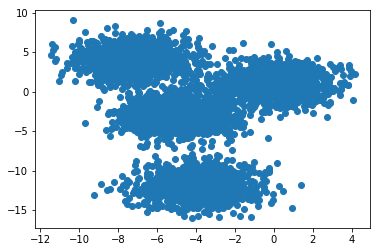

In [2]:
size = 1000
# blob 1
x = np.random.normal(-4,1.5,(size))
y = np.random.normal(-12,1.5,(size))
# blob 2
x = np.concatenate((x,np.random.normal(0,1.5,(size))))
y = np.concatenate((y,np.random.normal(1,1.5,(size))))
# blob 3
x = np.concatenate((x,np.random.normal(-7,1.5,(size))))
y = np.concatenate((y,np.random.normal(4,1.5,(size))))
# blob 4
x = np.concatenate((x,np.random.normal(-5,1.5,(size))))
y = np.concatenate((y,np.random.normal(-3,1.5,(size))))

X = np.hstack((x[:,None],y[:,None]))

plt.scatter(X[:,0],X[:,1])
plt.show()

In [3]:
# find the point farthest from the cluster (excluding itself)
farthest = -1
dist = 0
for i in range(len(X)):
    # calculate the mean without the current point
    mean = np.delete(X,i,axis=0).mean(axis=0)
    # calculate distance of current point from said mean
    curr = ((X[i]-mean)**2).sum()
    if (curr>dist):
        # furthest so far
        dist = curr
        farthest = i
# furthest overall
diss = farthest

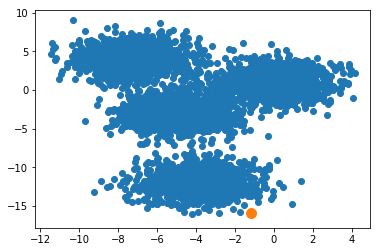

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[diss,0],X[diss,1],s=100)
plt.show()

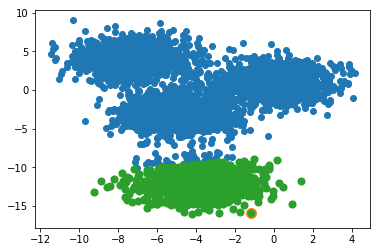

In [9]:
# mark all points that are closer to the farthest point than to all other points
mean = np.delete(X,diss,axis=0).mean(axis=0)
move = []
for i in range(len(X)):
    dist_to_diss = ((X[i]-X[diss])**2).sum()
    dist_to_rest = ((X[i]-mean)**2).sum()
    if (dist_to_diss<dist_to_rest):
        move.append(i)
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[diss,0],X[diss,1],s=100)
plt.scatter(X[move,0],X[move,1],s=50)
plt.show()

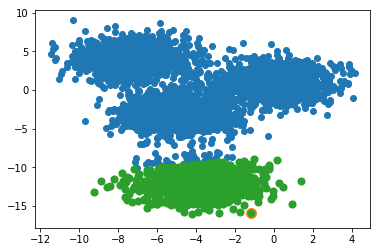

In [6]:
# mark all points that are closer to the farthest point than to all other points
# here recalculate the mean distances for remainder only
move = []
for i in range(len(X)):
    mean_rest = np.delete(X,[diss,i],axis=0).mean(axis=0)
    dist_to_diss = ((X[i]-X[diss])**2).sum()
    dist_to_rest = ((X[i]-mean_rest)**2).sum()
    if (dist_to_diss<dist_to_rest):
        move.append(i)
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[diss,0],X[diss,1],s=100)
plt.scatter(X[move,0],X[move,1],s=50)
plt.show()

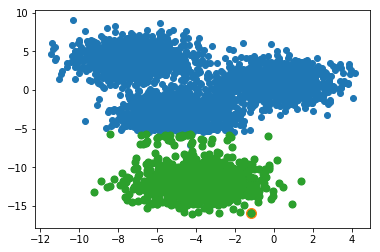

In [7]:
# mark all points that are closer to the farthest point than to all other points
# here the previously moved objects are taken into account
move = [diss]
for i in range(len(X)):
    mean_curr = X[move].mean(axis=0)
    mean_rest = np.delete(X,[move+[i]],axis=0).mean(axis=0)
    dist_to_diss = ((X[i]-mean_curr)**2).sum()
    dist_to_rest = ((X[i]-mean_rest)**2).sum()
    if (dist_to_diss<dist_to_rest):
        move.append(i)
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[diss,0],X[diss,1],s=100)
plt.scatter(X[move,0],X[move,1],s=50)
plt.show()

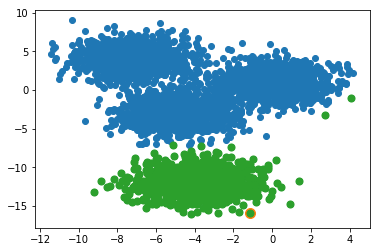

In [8]:
# mark all points that are closer to the farthest point than to all other points
# here recalculate the mean distances for both clusters
move = []
for i in range(len(X)):
    mean_with = X[[diss,i]].mean(axis=0)
    mean_rest = np.delete(X,[diss,i],axis=0).mean(axis=0)
    dist_to_diss = ((X[i]-mean_with)**2).sum()
    dist_to_rest = ((X[i]-mean_rest)**2).sum()
    if (dist_to_diss<dist_to_rest):
        move.append(i)
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[diss,0],X[diss,1],s=100)
plt.scatter(X[move,0],X[move,1],s=50)
plt.show()

### Conclusion:

First and second give the same, the first is the fastest. Last two give somewhat unpredictable results. I will have to test and see what works better in practice

### Next cluster

**First, rerun the first split, to update `move`**

In [10]:
# remainder
cluster1 = np.delete(X,move,axis=0)
# found cluster
cluster2 = X[move]

len(cluster1),len(cluster2)

(3045, 955)

In [11]:
biggest = cluster1

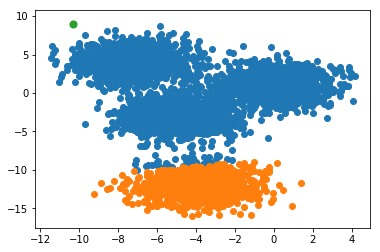

In [12]:
# find furthest again
farthest = -1
dist = 0
for i in range(len(biggest)):
    # calculate the mean without the current point
    mean = np.delete(biggest,i).mean(axis=0)
    # calculate distance of current point from said mean
    curr = ((biggest[i]-mean)**2).sum()
    if (curr>dist):
        # furthest so far
        dist = curr
        farthest = i
# furthest overall
diss = farthest
plt.scatter(cluster1[:,0],cluster1[:,1])
plt.scatter(cluster2[:,0],cluster2[:,1])
plt.scatter(biggest[diss,0],biggest[diss,1],s=50)
plt.show()

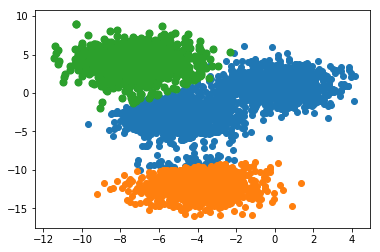

In [13]:
move = [diss]
for i in range(len(biggest)):
    mean_curr = biggest[move].mean(axis=0)
    mean_rest = np.delete(biggest,[move+[i]]).mean(axis=0)
    dist_to_diss = ((biggest[i]-mean_curr)**2).sum()
    dist_to_rest = ((biggest[i]-mean_rest)**2).sum()
    if (dist_to_diss<dist_to_rest):
        move.append(i)
plt.scatter(cluster1[:,0],cluster1[:,1])
plt.scatter(cluster2[:,0],cluster2[:,1])
plt.scatter(biggest[move,0],biggest[move,1],s=50)
plt.show()

### Automate

In [14]:
def find_farthest(X):
    '''Find the point that is the farthest from all other points (using Euclidean distance)'''
    max_index = -1
    max_distance = 0
    for i in range(len(X)):
        # calculate the mean without the current point
        mean = np.delete(X,i).mean(axis=0)
        # calculate distance of current point from mean
        distance = ((X[i]-mean)**2).sum()
        if (distance>max_distance):
            # farthest so far
            max_distance = distance
            max_index = i
    return max_index

In [19]:
def find_cluster(X,p):
    '''
    Find all points in X that are closer to p than to the remainder of the points in X
    '''
    cluster = [p]
    # precalculate mean of the original cluster
    mean_remainder = np.delete(X,p,axis=0).mean(axis=0)
    for i in range(len(X)):
        # calculate distances to clusters
        d_cluster = ((X[i]-X[p])**2).sum()
        d_remainder = ((X[i]-mean_remainder)**2).sum()
        if (d_cluster<d_remainder):
            # point is closer to cluster
            cluster.append(i)
    return np.array(cluster)

In [20]:
def find_cluster_1(X,p):
    '''
    Find all points in X that are closer to p than to the remainder of the points in X
    '''
    cluster = [p]
    # precalculate mean of the original cluster
    for i in range(len(X)):
        mean_curr = X[cluster].mean(axis=0)        
        mean_remainder = np.delete(X,[cluster+[i]],axis=0).mean(axis=0)
        # calculate distances to clusters
        d_cluster = ((X[i]-mean_curr)**2).sum()
        d_remainder = ((X[i]-mean_remainder)**2).sum()
        if (d_cluster<d_remainder):
            # point is closer to cluster
            cluster.append(i)
    return np.array(cluster)

In [21]:
def fit(X,k):
    '''
    Splits data into k clusters
    '''
    clusters = [X]
    while (len(clusters)<k):
        # find biggest cluster
        biggest = np.argmax([len(c) for c in clusters])
        x = clusters.pop(biggest)
        p = find_farthest(x)
        new_cluster = find_cluster(x,p)
        clusters.append(x[new_cluster])
        clusters.append(np.delete(x,new_cluster,axis=0))           
    return clusters

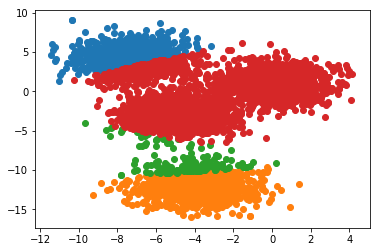

In [22]:
c = fit(X,4)
for i in range(len(c)):
    plt.scatter(c[i][:,0],c[i][:,1])
plt.show()

Using first option, doesn't seem very good

In [23]:
def find_cluster(X,p):
    '''
    Find all points in X that are closer to p than to the remainder of the points in X
    '''
    cluster = [p]
    # precalculate mean of the original cluster
    for i in range(len(X)):
        mean_curr = X[cluster].mean(axis=0)        
        mean_remainder = np.delete(X,[cluster+[i]],axis=0).mean(axis=0)
        # calculate distances to clusters
        d_cluster = ((X[i]-mean_curr)**2).sum()
        d_remainder = ((X[i]-mean_remainder)**2).sum()
        if (d_cluster<d_remainder):
            # point is closer to cluster
            cluster.append(i)
    return np.array(cluster)

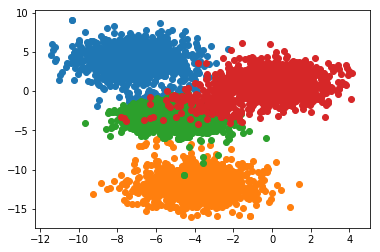

In [24]:
c = fit(X,4)
for i in range(len(c)):
    plt.scatter(c[i][:,0],c[i][:,1])
plt.show()

Somewhat better, but k-means still looks better

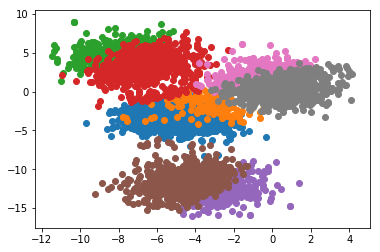

In [25]:
c = fit(X,8)
for i in range(len(c)):
    plt.scatter(c[i][:,0],c[i][:,1])
plt.show()

### Recreate data

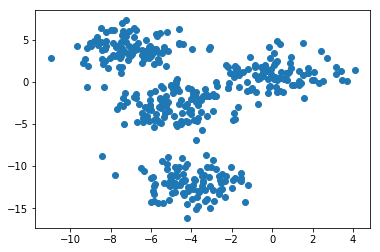

In [26]:
size = 100
# blob 1
x = np.random.normal(-4,1.5,(size))
y = np.random.normal(-12,1.5,(size))
# blob 2
x = np.concatenate((x,np.random.normal(0,1.5,(size))))
y = np.concatenate((y,np.random.normal(1,1.5,(size))))
# blob 3
x = np.concatenate((x,np.random.normal(-7,1.5,(size))))
y = np.concatenate((y,np.random.normal(4,1.5,(size))))
# blob 4
x = np.concatenate((x,np.random.normal(-5,1.5,(size))))
y = np.concatenate((y,np.random.normal(-3,1.5,(size))))

X = np.hstack((x[:,None],y[:,None]))

plt.scatter(X[:,0],X[:,1])
plt.show()

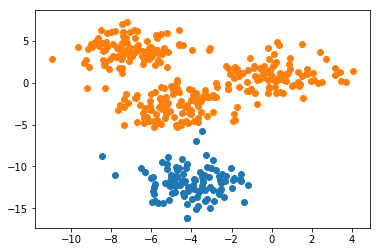

In [27]:
c = fit(X,2)
for i in range(len(c)):
    plt.scatter(c[i][:,0],c[i][:,1])
plt.show()

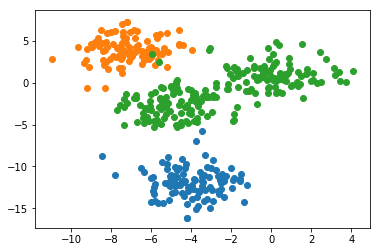

In [28]:
c = fit(X,3)
for i in range(len(c)):
    plt.scatter(c[i][:,0],c[i][:,1])
plt.show()

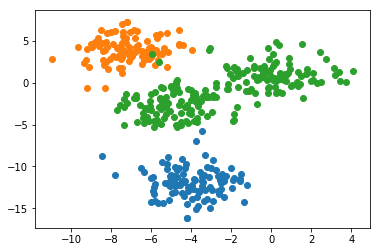

In [29]:
c = fit(X,3)
for i in range(len(c)):
    plt.scatter(c[i][:,0],c[i][:,1])
plt.show()

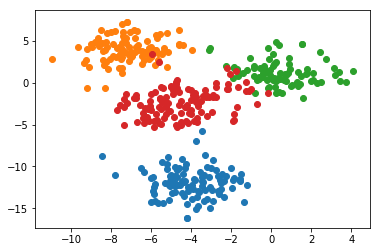

In [30]:
c = fit(X,4)
for i in range(len(c)):
    plt.scatter(c[i][:,0],c[i][:,1])
plt.show()

### Conclusion

Performance is decent, but not as good as k-means